# Proyecto 2
## David Henao Molina - Maria Camila Bravo

In [567]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.signal as signal 
from scipy.fftpack import fft
from scipy.signal import detrend
from scipy.fftpack import fft
from numpy.polynomial.polynomial import Polynomial

### Extracción de los datos


In [568]:
ruta_base = os.getcwd()
ruta_base

'/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Biosenales_20242'

In [569]:
#ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\Diagnostics.xlsx"
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"
dataframe = pd.read_excel(ruta)
dataframe

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


#### Creamos el nuevo dataframe que va a contener solo los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation)

In [570]:
df_filtrado= dataframe[(dataframe['Rhythm'] == 'SB') | (dataframe['Rhythm'] == 'AFIB')]
df_filtrado = df_filtrado.reset_index(drop=True)
df_filtrado

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
3,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
4,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,MUSE_20180114_134724_10000,SB,LVHV,56,FEMALE,56,56,88,444,428,49,62,9,219,263,441
5665,MUSE_20180113_122544_20000,SB,NONE,38,FEMALE,56,56,88,434,418,69,54,10,218,262,435
5666,MUSE_20180114_074720_85000,SB,NONE,55,FEMALE,57,57,94,414,402,-4,1,10,212,259,419
5667,MUSE_20180115_131524_93000,AFIB,RBBB TWC,70,MALE,93,82,130,386,479,61,194,15,225,290,418


In [571]:
fs = 500 # frecuencia de muestre mencionada 
t = np.arange(0, df_filtrado.shape[0]/fs,1/fs) 
t.shape

(5669,)

#### Extracción de las señales de ECG de la derivación II

In [572]:
#datos = pd.read_csv('c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\ECGDataDenoised\\MUSE_20180112_073319_29000.csv',delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
ruta = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/ECGDataDenoised/MUSE_20180111_155115_19000.csv'
datos = pd.read_csv(ruta, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_interes = datos['II']
datos


,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-165.33,-358.970,-121.710,270.250,-28.869,-231.16,448.39,636.52,618.45,-7.8987,-315.160,-570.84
1,-150.75,-336.810,-114.980,251.410,-23.883,-217.52,441.74,646.47,642.56,35.3890,-269.510,-532.21
2,-136.69,-315.560,-108.630,233.450,-19.126,-204.36,436.06,656.31,665.95,76.5720,-225.830,-495.39
3,-123.74,-296.230,-103.090,217.230,-14.815,-192.29,432.27,666.14,688.05,113.5100,-186.000,-461.84
4,-112.57,-279.750,-98.611,203.530,-11.213,-181.87,431.08,676.31,708.47,144.3000,-151.680,-432.56
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-190.32,52.396,170.760,74.543,-170.890,107.63,310.73,398.59,538.11,230.9700,87.684,-249.88
4996,-178.98,65.438,171.870,62.325,-165.650,114.41,302.32,398.80,541.18,245.2700,110.940,-226.42
4997,-171.04,74.181,172.080,53.876,-161.490,118.93,297.25,401.02,544.16,254.4800,129.340,-207.20
4998,-165.46,79.570,171.300,48.203,-157.840,121.64,293.97,403.86,546.18,259.5100,144.140,-190.64


In [573]:
folder_path = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/ECGDataDenoised'
#folder_path = r'c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\ECGDataDenoised'

# Diccionario para almacenar los datos de la derivación II por cada paciente
ecg_dict = {}

# Iterar sobre el FileName del dataframe filtrado
for filename in df_filtrado['FileName']:
    file_path = os.path.join(folder_path, filename + '.csv')
    
    if os.path.exists(file_path):
        datos = pd.read_csv(file_path, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        derivacion_II = datos['II'].values # Cargamos solo la derivación II y lo llevamos a arreglos
        ecg_dict[filename] = derivacion_II
    else:
        print(f"El archivo {filename}.csv no se encontró.")
print('Datos almacenados en dicionario ecg_dict de derivacion II')

ecg_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in ecg_dict.items()]))

Datos almacenados en dicionario ecg_dict de derivacion II


# Formula 1 - Detrend Polinomico

##### La primera fórmula se centra en cuantificar la desviación entre la señal original de ECG y la señal después de haber sido eliminada su tendencia (detrended). En este contexto, la desviación, denotada como δ(n), se define como el promedio de las diferencias al cuadrado entre las amplitudes de la señal original x(0) y la señal sin tendencia x(n), a lo largo de todos los puntos de la señal (k).


In [574]:
def detrend(x, n):
    k = len(x)
    t = np.arange(k)
    poly_coeffs = np.polyfit(t, x, n)
    trend = np.polyval(poly_coeffs, t)
    xn = x - trend
    return xn


/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_9819/1041325771.py:4: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(t, x, n)


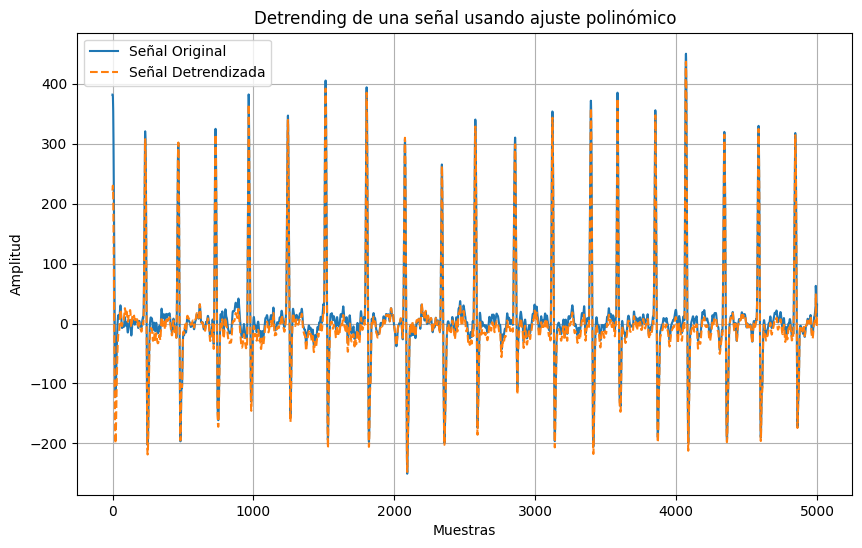

In [575]:
x = ecg_dict['MUSE_20180113_171327_27000']
n = 20# Elegir un grado para el polinomio

# Aplicar el detrend
xn = detrend(x, n)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(x, label='Señal Original')
#plt.plot(trend, label=f'Tendencia (grado {n})', linestyle='--')
plt.plot(xn, label='Señal Detrendizada', linestyle='--')
plt.legend()
plt.title('Detrending de una señal usando ajuste polinómico')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# 2. Formula Compresión 

#### La fórmula es un proceso de normalización de la señal de ECG. La idea es ajustar todos los valores de la serie temporal de ECG, x(tk), a un rango entre 0 y 1, utilizando los valores máximo (xmax) y mínimo (xmin) de esa señal. Este ajuste se realiza para facilitar la comparación entre diferentes conjuntos de datos sin que se vean influenciados por la escala original de las señales.

In [576]:
def compression(c, Xmin, Xmax):
  return (c - Xmin) / (Xmax - Xmin)


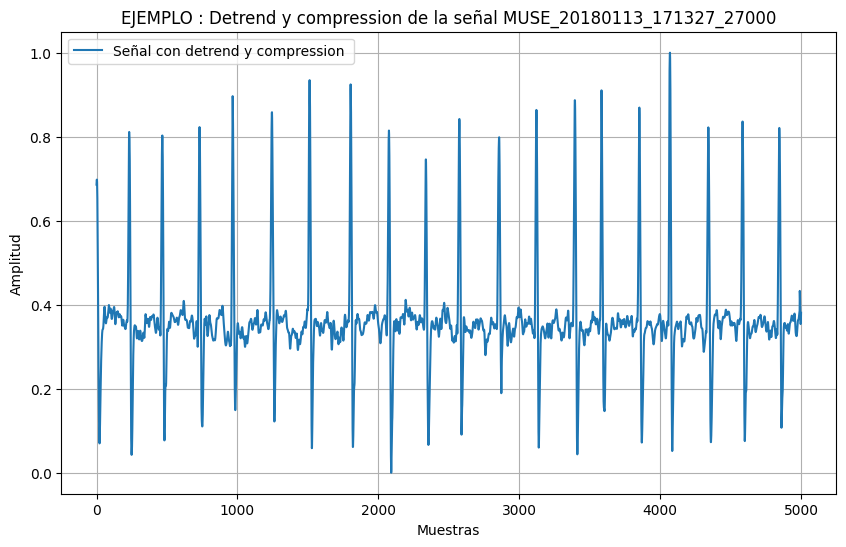

In [577]:
# definir los valores mínimos y máximos
Xmin = np.min(xn)
Xmax = np.max(xn)

s = compression(xn,Xmin,Xmax)
plt.figure(figsize=(10, 6))
plt.plot(s, label='Señal con detrend y compression ')
plt.legend()
plt.title('EJEMPLO : Detrend y compression de la señal MUSE_20180113_171327_27000')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

La señal comprimida tiene un offset, hay que aplicar nuevamete el drtrend

/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_9819/1041325771.py:4: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(t, x, n)


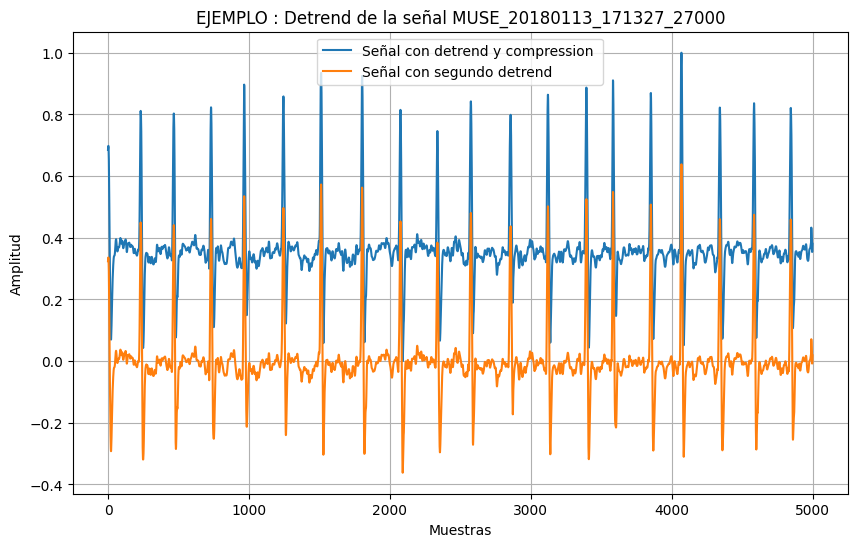

In [578]:
x_nuevo = detrend(s,20)
plt.figure(figsize=(10, 6))
plt.plot(s, label='Señal con detrend y compression ')
plt.plot(x_nuevo, label='Señal con segundo detrend')
plt.legend()
plt.title('EJEMPLO : Detrend de la señal MUSE_20180113_171327_27000')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# 3. Formula Biespectro: Analisis Expectral de Potencia

#### Se calcula a través de la Transformada Rápida de Fourier (FFT), el espectro de potencia de los datos se obtiene revelando que la mayor parte de la potencia se concentra en un rango de frecuencias, esta formula se utiliza para medir la relación entre pares de frecuencias en una señal y evaluar cómo estas frecuencias interactúan entre sí.

In [579]:
def bispectrum(signal, n_segments):
    N = len(signal) // n_segments  # Tamaño de cada segmento
    bispec = np.zeros((N, N), dtype=complex)  # Matriz para almacenar el bispectro

    for i in range(n_segments):
        segment = signal[i * N:(i + 1) * N]
        X = fft(segment)

        for f1 in range(N):
            for f2 in range(N):
                if f1 + f2 < N:
                    bispec[f1, f2] += X[f1] * X[f2] * np.conj(X[f1 + f2])
                    
    # Promediar el bispectro
    bispec /= n_segments
    
    return bispec

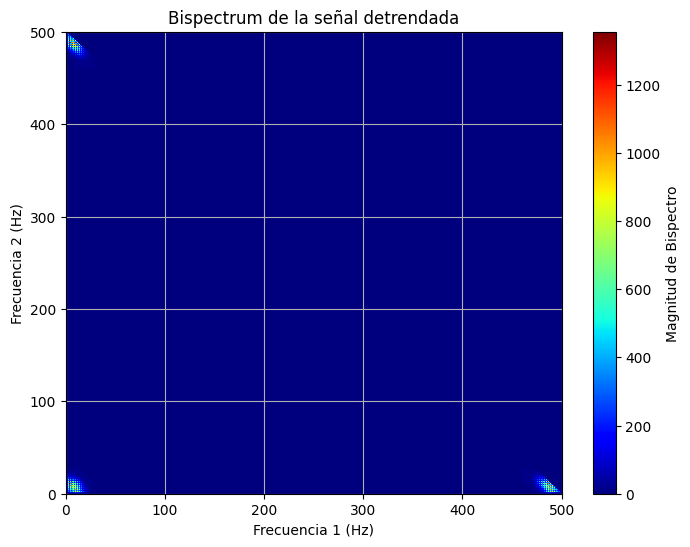

In [580]:
bispec = bispectrum(x_nuevo, n_segments=10)

bispec_magnitude = np.abs(bispec)  

# Graficar el bispectro
plt.figure(figsize=(8, 6))
plt.imshow(bispec_magnitude, extent=[0, bispec.shape[0], 0, bispec.shape[1]], 
           cmap='jet', aspect='auto', origin='lower')
plt.colorbar(label='Magnitud de Bispectro')
plt.title('Bispectrum de la señal detrendada')
plt.xlabel('Frecuencia 1 (Hz)')
plt.ylabel('Frecuencia 2 (Hz)')
plt.xlim(0, bispec.shape[0])  # Ajustar límites de frecuencia según el tamaño
plt.ylim(0, bispec.shape[1])
plt.grid(True)
plt.show()



#### Fórmula 4: Cálculo de la bicoherencia

In [581]:
def bicoherence(bispec):
    numer = np.abs(bispec)  # Magnitud del bispectro
    denom = np.sum(np.abs(bispec), axis=0)  # Sumar por columnas
    denom[denom == 0] = 1e-10  # Evitar división por cero
    bicoherence_values = numer / denom  # Cálculo de bicoherencia
    return bicoherence_values




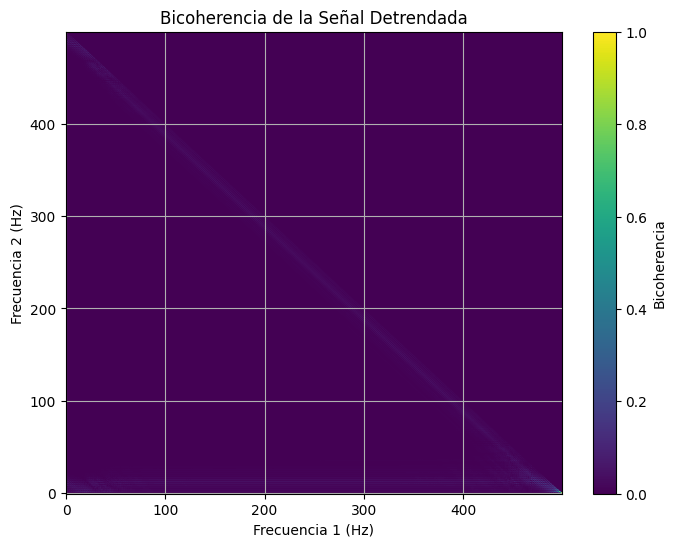

In [582]:
# Calcular la bicoherencia
bicoh = bicoherence(bispec)

# Guardar la bicoherencia en un array
bicoherence_array = bicoh 

# Graficar la bicoherencia
plt.figure(figsize=(8, 6))
plt.imshow(bicoherence_array, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Bicoherencia')
plt.title('Bicoherencia de la Señal Detrendada')
plt.xlabel('Frecuencia 1 (Hz)')
plt.ylabel('Frecuencia 2 (Hz)')
plt.grid(True)
plt.show()

# 4. EXTRACCION DE FRECUENCIA QUE CONTIENE MAXIMA POTENCIA 

{'Máxima frecuencia': np.float64(9.0)}


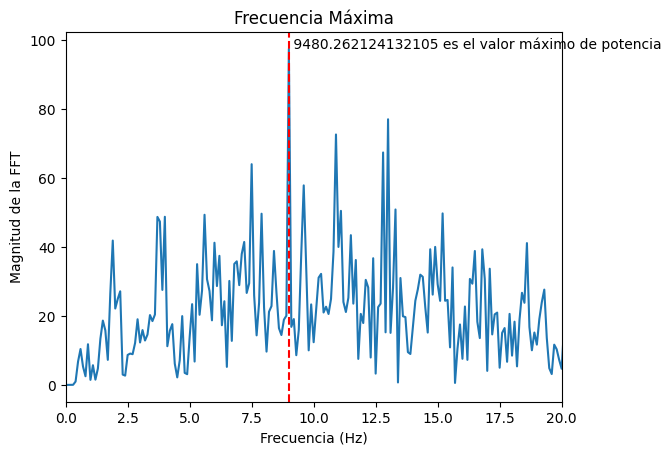

In [591]:
def MAX_Pot(signal, grafico: bool = True):
    FT = np.fft.fft(signal)
    FT = np.abs(FT[:len(FT)//2])  # Magnitud de la FFT
    freqs = np.fft.fftfreq(len(signal), 1/500)
    freqs = freqs[:len(freqs)//2]
    power = np.abs(FT)**2  # Potencia
    maxV = np.argmax(power)  # Índice de la frecuencia con mayor potencia
    maxFf = round(freqs[maxV], 5)  # Frecuencia correspondiente
    max = power[maxV]  # Valor de potencia máxima
    maxF = FT[maxV]  # Valor de magnitud en la FFT para la frecuencia máxima
    
    if grafico:
        plt.figure()
        plt.plot(freqs, FT)
        plt.xlim([0, 20])
        plt.axvline(maxFf, color='r', linestyle='--', label='Frecuencia Máxima')
        plt.text(maxFf, maxF, f' {power[maxV]} es el valor máximo de potencia')
        plt.title('Frecuencia Máxima')
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Magnitud de la FFT')
    
    return {'Máxima frecuencia': maxFf}

# Ejemplo de señal corregida
señal_ejemplo = detrend(compression(detrend(x, 15), np.min(x), np.max(x)), 15)
resultado = MAX_Pot(señal_ejemplo)

print(resultado)


# 5. Para la señal sumar el número de frecuencias que son significativas para bicoherencia 


Umbral: 0.09591663046625439
Número de frecuencias significativas: 92


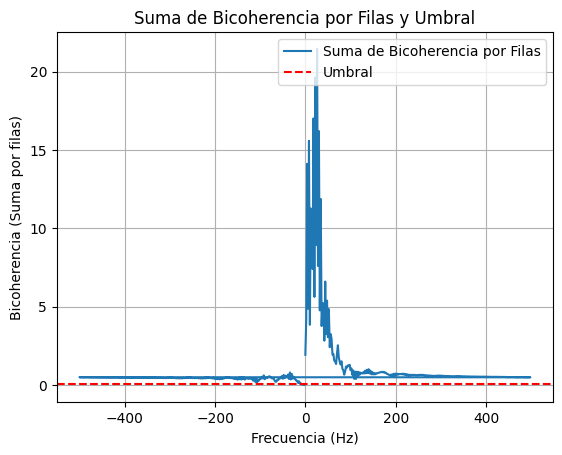

In [584]:


# Calcular el tamaño N (número de frecuencias)
N = bicoh.shape[0]  # o bicoh.shape[1], dependiendo del tamaño de la matriz

# Calcular el umbral
threshold = np.sqrt(9.2 / (2 * N))
print(f"Umbral: {threshold}")

# Contar el número de frecuencias que superan el umbral
significant_frequencies_count = np.sum(bicoherence_array > threshold)
print(f"Número de frecuencias significativas: {significant_frequencies_count}")

# Sumar la bicoherencia a lo largo de las filas
bicoherence_sum = np.sum(bicoherence_array, axis=1)

# Graficar la suma de la bicoherencia por filas
frequencies = np.fft.fftfreq(N, d=1/1000) 

plt.plot(frequencies[:len(bicoherence_sum)], bicoherence_sum, label='Suma de Bicoherencia por Filas')
plt.axhline(y=threshold, color='r', linestyle='--', label='Umbral')
plt.title('Suma de Bicoherencia por Filas y Umbral')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Bicoherencia (Suma por filas)')
plt.legend()
plt.grid(True)
plt.show()



# 6. Rutina

In [592]:
data_to_append = []

# Procesar el DataFrame filtrado
for index, row in df_filtrado.iterrows():
    registro = row['FileName']
    estado = row['Rhythm']
    
    # Verificar si el registro está en ecg_dict
    if registro in ecg_dict:
        signal = ecg_dict[registro]  # Obtener la señal del diccionario
        
        # Aplicar detrending a la señal 
        detrended_signal = detrend(signal, n=15)  
        
        # Calcular Xmin y Xmax para la compresión
        Xmin = np.min(detrended_signal)
        Xmax = np.max(detrended_signal)
        
        # Aplicar compresión
        compressed_signal = compression(detrended_signal, Xmin, Xmax)
        
        # Aplicar detrending de nuevo (verifica si es necesario)
        detrended_signal2 = detrend(compressed_signal, n=15) 
        
        # Calcular la frecuencia máxima de potencia
        fMP_result = MAX_Pot(detrended_signal2, grafico=False)  
        
        # Acumular los datos en la lista
        data_to_append.append({
            'Registro': registro,
            'Estado': estado,
            'fMP': fMP_result['Máxima frecuencia'],  # Usar la clave correcta para fMP
            'sFSB': None  # Placeholder para sFSB
        })
    else:
        print(f"El registro {registro} no se encontró en ecg_dict.")

# Convertir la lista en un DataFrame
Data_rutina = pd.DataFrame(data_to_append)

# Mostrar el DataFrame resultante
Data_rutina


,Registro,Estado,fMP,sFSB
0,MUSE_20180113_171327_27000,AFIB,9.0,None
1,MUSE_20180112_073319_29000,SB,2.6,None
2,MUSE_20180113_121940_44000,SB,2.7,None
3,MUSE_20180112_120347_79000,SB,3.8,None
4,MUSE_20180114_075026_69000,AFIB,4.2,None
...,...,...,...,...
5664,MUSE_20180114_134724_10000,SB,2.8,None
5665,MUSE_20180113_122544_20000,SB,0.9,None
5666,MUSE_20180114_074720_85000,SB,15.3,None
5667,MUSE_20180115_131524_93000,AFIB,2.6,None


# 7.Rutinas Punto 2

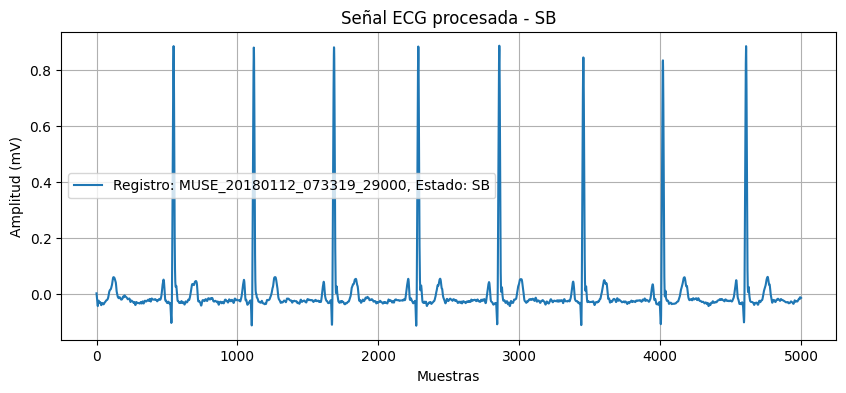

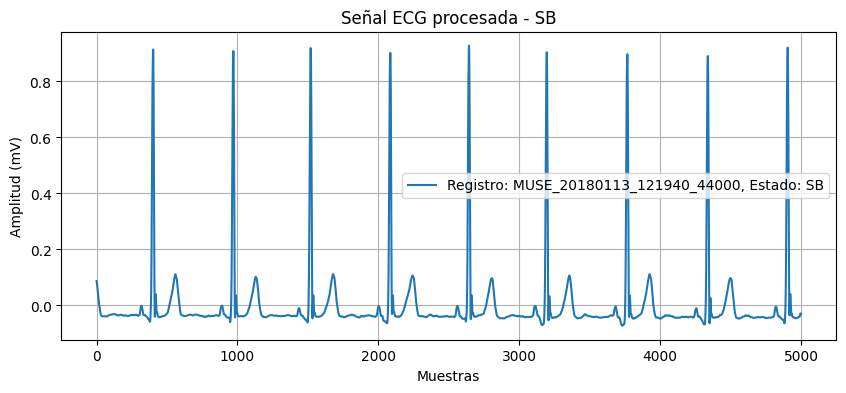

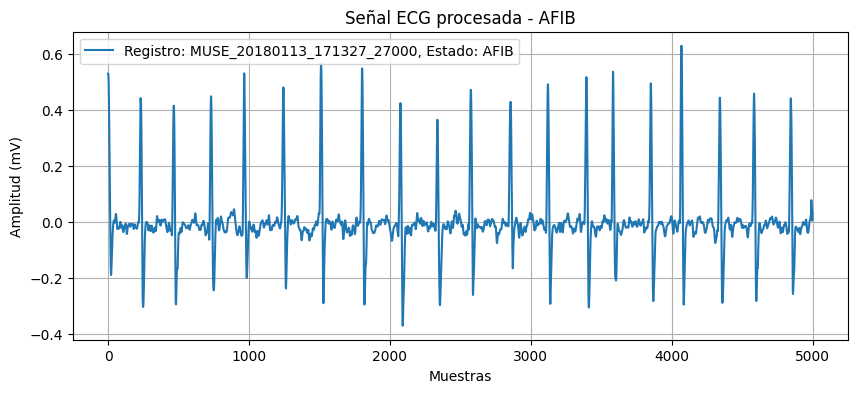

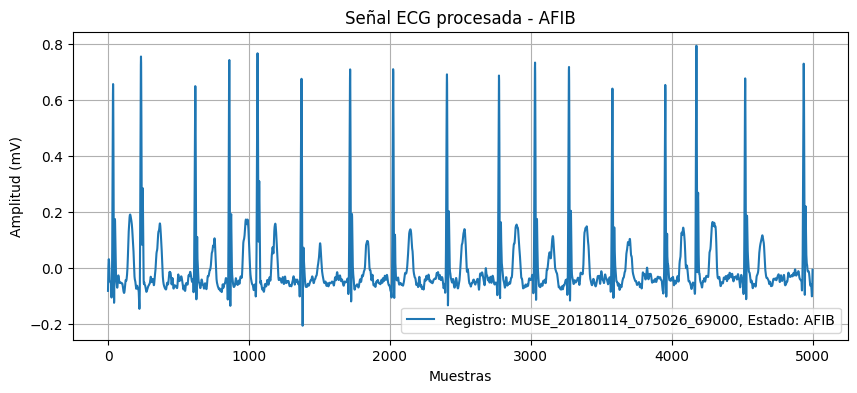

In [598]:
def process_signal(signal):
    # Aplicar detrending a la señal (sin argumento 'n')
    detrended_signal = detrend(signal, type='linear')  # Puedes cambiar 'linear' a 'constant' si prefieres
    
    # Calcular Xmin y Xmax para la compresión
    Xmin = np.min(detrended_signal)
    Xmax = np.max(detrended_signal)
    
    # Aplicar compresión (asegúrate de que 'compression' esté definida)
    compressed_signal = compression(detrended_signal, Xmin, Xmax)
    
    # Aplicar detrending de nuevo si es necesario (usa 'linear' o 'constant')
    detrended_signal2 = detrend(compressed_signal, type='linear')
    
    return detrended_signal2

# Filtrar el DataFrame por SB y AFIB, seleccionando 2 registros de cada uno
df_SB = Data_rutina[Data_rutina['Estado'] == 'SB'].head(2)
df_AFIB = Data_rutina[Data_rutina['Estado'] == 'AFIB'].head(2)

# Concatenar ambos DataFrames filtrados
df_filtrado_seleccion = pd.concat([df_SB, df_AFIB])

# Procesar y graficar las señales seleccionadas
for index, row in df_filtrado_seleccion.iterrows():
    registro = row['Registro']
    estado = row['Estado']
    
    # Verificar si el registro está en ecg_dict
    if registro in ecg_dict:
        signal = ecg_dict[registro]  
        
        # Procesar la señal
        processed_signal = process_signal(signal)
        
        # Graficar la señal procesada
        plt.figure(figsize=(10, 4))
        plt.plot(processed_signal, label=f'Registro: {registro}, Estado: {estado}')
        plt.title(f'Señal ECG procesada - {estado}')
        plt.xlabel('Muestras')
        plt.ylabel('Amplitud (mV)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"El registro {registro} no se encontró en ecg_dict.")
